In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

2025-08-11 11:31:12.533395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-11 11:31:12.589644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-11 11:31:13.981709: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
print('Number of images in training Dataset:', train_images.shape[0])
print('Number of images in testing Dataset:', test_images.shape[0])

Number of images in training Dataset: 60000
Number of images in testing Dataset: 10000


In [4]:
print(f"Shape of the images in the training dataset:" ,{train_images[0].shape})

Shape of the images in the training dataset: {(28, 28)}


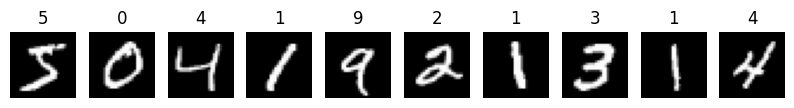

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

/home/caleb/Dev/calebfelix/ai/neural-network/handwritten-digit-recognition/venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-11 11:31:15.346768: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=6
)

Epoch 1/6


2025-08-11 11:31:15.468475: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9294 - loss: 0.2411
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9697 - loss: 0.1007
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0711
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0551
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0397
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0351


In [8]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title("Class Probability")
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


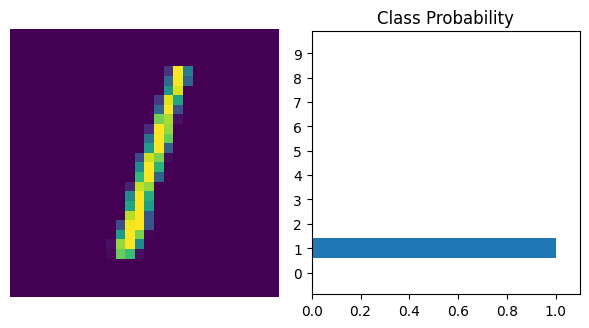

In [9]:
image, label = test_images[2], test_labels[2]
probabilities = model.predict(image.reshape(1, 28, 28, 1))
view_classify(image, probabilities[0])

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.0750
Accuracy of the neural network on the 10000 test images: 97.83%


In [ ]:
model.save('my_model.h5')
print("Model saved!")

saved_model = load_model('my_model.h5')
if saved_model is not None:
    print("Model loaded successfully!")
else:
    print("Failed to load the model.")

Model loaded successfully!


In [12]:
saved_model = load_model('my_model.h5')
if saved_model is not None:
    print("Model loaded successfully!")
else:
    print("Failed to load the model.")

Model loaded successfully!


# Run Saved Model From Here:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


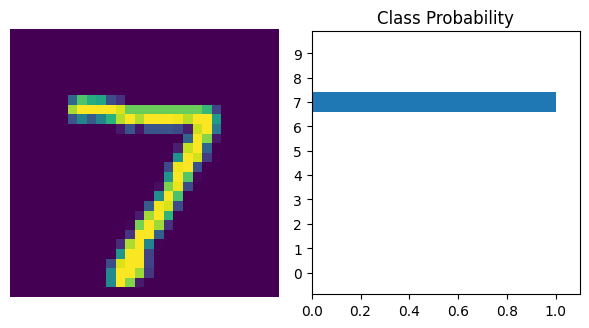

In [15]:
test_image = 0 #change value here to change the test image(0 to 999)

image, label = test_images[test_image], test_labels[test_image]
probabilities = saved_model.predict(image.reshape(1, 28, 28, 1))
view_classify(image, probabilities[0])